In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
main_data_df = pd.read_csv("RevisedProjectData.xlsx - MainData.csv").drop(10704)
main_data_df_no_nulls = main_data_df[~main_data_df['lastgiftdate'].isna()].copy()
main_data_df_no_nulls['lastgiftdate'] = main_data_df['lastgiftdate'].str.split("/")
main_data_df_no_nulls['lastgiftdate'] = main_data_df_no_nulls['lastgiftdate'].apply(lambda x : dt.datetime(int(x[2]), int(x[0]), int(x[1])))
main_data_df_no_nulls


,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor
1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor
2,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor
3,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor
4,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,589ec91a2ec0cfdabeae1176e9e03b12,subscribed,87,17,10,321,11,11,2022-09-02,Donor,Silver,SingleDonor,Multiple Single Donations,Multiple Single Donations
10700,30224a0678792ebc3397051ac0dcf338,subscribed,87,62,7,20,20,10,2022-09-05,Donor,Silver,Recurring Donor - Past Due Payment,Multiple Single Donations,Monthly
10701,2edb69d637bdf219d9d84364952900ca,transactional,0,0,0,0,421,106,2022-09-06,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations
10702,fa12a4e0b7814f1775ea05781be1d8da,subscribed,113,11,7,0,421,106,2022-09-06,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations


In [4]:
campaign_lookup_df = pd.read_csv("RevisedProjectData.xlsx - CampaignLookup.csv")
campaign_lookup_df

,campaign_id,EmailSendDate,campaign_title,subject_line
0,5db10caef0,9/1/2022,#106 Recurring Membership Email Ad,Join our New Community of Monthly Givers
1,b65e3f8c87,8/19/2022,#105 Generosity Crisis BOTTOM BUTTON,Individual Giving: Why we need you.
2,94c82f9011,8/19/2022,#105 Generosity Crisis TOP BUTTON,Individual Giving: Why we need you.
3,c7491f32d6,8/19/2022,#105 Generosity Crisis TOP BOTTOM BUTTON,Individual Giving: Why we need you.
4,c4e4a41cf3,8/12/2022,#104 FARM LABOR SHORTAGE BOTTOM BUTTON TEST A,There's a huge issue... Farm Labor Shortages
...,...,...,...,...
202,8871c46ae9,6/25/2020,Tax (test),Tax Receipt -- Farmlink
203,7dde9313a3,6/24/2020,FarmLink in over 23 states!,FarmLink Reaches 4 Million Pounds!
204,492dedea24,6/20/2020,Special thank you >=$600 donors 06/19,A Special Thank You From FarmLink
205,09e06fe9e8,6/20/2020,Special thank you $500 donors 06/19,A Special Thank You From FarmLink


In [5]:
clicks_df = pd.read_csv("RevisedProjectData.xlsx - Clicks.csv")
clicks_df

,campaign_id,id,url_id,url,clicks
0,aaa8b769ec,0b3f8049bef42fb9e4af87c71bc1ad54,5822587f17,https://thefarmlinkproject.us10.list-manage.co...,1
1,b2287bf4fd,0b3f8049bef42fb9e4af87c71bc1ad54,254d0710ab,https://thefarmlinkproject.us10.list-manage.co...,1
2,7dde9313a3,0c573eeb4488e4d57736d69be04f43f8,31bbc212c0,https://thefarmlinkproject.org/milk-to-virgini...,1
3,95fefc388b,0c573eeb4488e4d57736d69be04f43f8,6e53eff663,https://volunteer.farmlinkproject.org/,1
4,d71b57ada0,17f386a8258517edc7dffb091bfacc1b,435999c956,https://thefarmlinkproject.org/store,1
...,...,...,...,...,...
32872,6d6216a039,ee26cc7a34ca900b630eb04486dcd6a8,36cf9ca4dc,https://www.farmlinkproject.org/?form=donate&u...,1
32873,b2287bf4fd,ee26cc7a34ca900b630eb04486dcd6a8,78ca3e3ff0,https://www.youtube.com/watch?v=kxqQzDZp-hU&ab...,1
32874,a966ee752a,ee26cc7a34ca900b630eb04486dcd6a8,5b51966ea9,https://www.farmlinkproject.org/crypto?utm_sou...,1
32875,8f285ecb38,ee26cc7a34ca900b630eb04486dcd6a8,8cd83c8776,https://zoom.us/webinar/register/WN_vZ-pmGDOQo...,1


In [6]:
unique_opens_df = pd.read_csv("RevisedProjectData.xlsx - UniqueOpens.csv")
unique_opens_df

,campaign_id,id,opens,last_open
0,71bbb1f324,7834f22da47662f57a8de95eee2c694a,2,12/30/2021
1,71bbb1f324,95ef07eb12eb5946c555f01cb37c18fd,1,1/1/2022
2,71bbb1f324,a718bc6ff6f42397780770aa4c7f5a06,1,12/31/2021
3,71bbb1f324,458d8a739f0a04407462c911f44fe27e,3,12/30/2021
4,71bbb1f324,441161ef455b1a3e009076d4677238e0,1,12/31/2021
...,...,...,...,...
348877,6592200ac7,45e564e8efa94ffe97fcb67b018000d5,1,10/17/2021
348878,6592200ac7,3efa2b581c06abd8f755c5b91af96433,1,10/15/2021
348879,6592200ac7,00d5aa7e23f14a80a7612ff869c00cdb,1,10/26/2021
348880,6592200ac7,c93e082d4f0d890de391f023808095ee,1,10/20/2021


In [7]:
donations_df = pd.read_csv("RevisedProjectData.xlsx - Donations.csv")
donations_grouped_df = donations_df.groupby('id')['DonationAmount'].agg(['sum', 'count']).round(2)

In [8]:
main_data_donations_joined = main_data_df_no_nulls.merge(donations_grouped_df, on='id')
main_data_donations_joined.drop_duplicates(keep='first')
main_data_donations_joined['lifetodategiving'] = main_data_donations_joined['sum']
main_data_donations_joined = main_data_donations_joined.drop(columns='sum').rename(columns={'count': 'totallifedonations'})

main_data_donations_joined



,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification,totallifedonations
0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200.00,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor,1
1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor,3
2,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor,3
3,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor,3
4,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200.00,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,589ec91a2ec0cfdabeae1176e9e03b12,subscribed,87,17,10,320.97,11,11,2022-09-02,Donor,Silver,SingleDonor,Multiple Single Donations,Multiple Single Donations,4
10700,30224a0678792ebc3397051ac0dcf338,subscribed,87,62,7,20.00,20,10,2022-09-05,Donor,Silver,Recurring Donor - Past Due Payment,Multiple Single Donations,Monthly,2
10701,2edb69d637bdf219d9d84364952900ca,transactional,0,0,0,1248.85,421,106,2022-09-06,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations,12
10702,fa12a4e0b7814f1775ea05781be1d8da,subscribed,113,11,7,1248.85,421,106,2022-09-06,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations,12


In [9]:
most_recent_purchase_date = main_data_donations_joined['lastgiftdate'].max()
main_data_donations_joined['recency'] = main_data_donations_joined['lastgiftdate'].apply(lambda x: (most_recent_purchase_date - x).days)
main_data_donations_joined


,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification,totallifedonations,recency
0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200.00,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor,1,866
1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor,3,866
2,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor,3,866
3,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor,3,866
4,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200.00,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor,1,866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,589ec91a2ec0cfdabeae1176e9e03b12,subscribed,87,17,10,320.97,11,11,2022-09-02,Donor,Silver,SingleDonor,Multiple Single Donations,Multiple Single Donations,4,4
10700,30224a0678792ebc3397051ac0dcf338,subscribed,87,62,7,20.00,20,10,2022-09-05,Donor,Silver,Recurring Donor - Past Due Payment,Multiple Single Donations,Monthly,2,1
10701,2edb69d637bdf219d9d84364952900ca,transactional,0,0,0,1248.85,421,106,2022-09-06,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations,12,0
10702,fa12a4e0b7814f1775ea05781be1d8da,subscribed,113,11,7,1248.85,421,106,2022-09-06,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations,12,0


In [10]:
rfm_df = main_data_donations_joined.copy()

rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['totallifedonations'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['lifetodategiving'].rank(ascending=True)

rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df



,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification,totallifedonations,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200.00,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor,1,866,0.028030,34.287850,70.849295
1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor,3,866,0.028030,87.405989,66.953191
2,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor,3,866,0.028030,87.405989,66.953191
3,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor,3,866,0.028030,87.405989,66.953191
4,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200.00,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor,1,866,0.028030,34.287850,70.849295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,589ec91a2ec0cfdabeae1176e9e03b12,subscribed,87,17,10,320.97,11,11,2022-09-02,Donor,Silver,SingleDonor,Multiple Single Donations,Multiple Single Donations,4,4,99.967299,90.988929,80.603569
10700,30224a0678792ebc3397051ac0dcf338,subscribed,87,62,7,20.00,20,10,2022-09-05,Donor,Silver,Recurring Donor - Past Due Payment,Multiple Single Donations,Monthly,2,1,99.981314,76.942122,6.194525
10701,2edb69d637bdf219d9d84364952900ca,transactional,0,0,0,1248.85,421,106,2022-09-06,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations,12,0,100.000000,97.108422,93.856863
10702,fa12a4e0b7814f1775ea05781be1d8da,subscribed,113,11,7,1248.85,421,106,2022-09-06,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations,12,0,100.000000,97.108422,93.856863


In [11]:
rfm_df['rfm_Score'] = (0.15*rfm_df['r_rank_norm']+0.28 * rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']) * 0.05
rfm_df = rfm_df.round(2)

rfm_df



,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification,totallifedonations,recency,r_rank_norm,f_rank_norm,m_rank_norm,rfm_Score
0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200.00,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor,1,866,0.03,34.29,70.85,2.50
1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor,3,866,0.03,87.41,66.95,3.13
2,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor,3,866,0.03,87.41,66.95,3.13
3,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,Gold,SingleDonor,Single Donor,Single Donor,3,866,0.03,87.41,66.95,3.13
4,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200.00,0,200,2020-04-23,Donor,Diamond,SingleDonor,Single Donor,Single Donor,1,866,0.03,34.29,70.85,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,589ec91a2ec0cfdabeae1176e9e03b12,subscribed,87,17,10,320.97,11,11,2022-09-02,Donor,Silver,SingleDonor,Multiple Single Donations,Multiple Single Donations,4,4,99.97,90.99,80.60,4.32
10700,30224a0678792ebc3397051ac0dcf338,subscribed,87,62,7,20.00,20,10,2022-09-05,Donor,Silver,Recurring Donor - Past Due Payment,Multiple Single Donations,Monthly,2,1,99.98,76.94,6.19,2.00
10701,2edb69d637bdf219d9d84364952900ca,transactional,0,0,0,1248.85,421,106,2022-09-06,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations,12,0,100.00,97.11,93.86,4.78
10702,fa12a4e0b7814f1775ea05781be1d8da,subscribed,113,11,7,1248.85,421,106,2022-09-06,Donor,Diamond,SingleDonor,Multiple Single Donations,Multiple Single Donations,12,0,100.00,97.11,93.86,4.78


In [12]:
rfm_df["customertype"] = np.where(rfm_df['rfm_Score'] > 4.5, "Top Customers",
                                      (np.where(rfm_df['rfm_Score'] > 4, "High value Customer",
                                        (np.where(rfm_df['rfm_Score'] > 3, "Medium Value Customer",
                                         (np.where(rfm_df['rfm_Score'] > 1.6, 'Low Value Customers', 
                                                   'Lost Customers')))))))

rfm_df



,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,...,DonorStatus,IndividualDonorType,Tier3Classification,totallifedonations,recency,r_rank_norm,f_rank_norm,m_rank_norm,rfm_Score,customertype
0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200.00,0,200,2020-04-23,Donor,...,SingleDonor,Single Donor,Single Donor,1,866,0.03,34.29,70.85,2.50,Low Value Customers
1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,...,SingleDonor,Single Donor,Single Donor,3,866,0.03,87.41,66.95,3.13,Medium Value Customer
2,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,...,SingleDonor,Single Donor,Single Donor,3,866,0.03,87.41,66.95,3.13,Medium Value Customer
3,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,150.00,0,50,2020-04-23,Donor,...,SingleDonor,Single Donor,Single Donor,3,866,0.03,87.41,66.95,3.13,Medium Value Customer
4,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200.00,0,200,2020-04-23,Donor,...,SingleDonor,Single Donor,Single Donor,1,866,0.03,34.29,70.85,2.50,Low Value Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,589ec91a2ec0cfdabeae1176e9e03b12,subscribed,87,17,10,320.97,11,11,2022-09-02,Donor,...,SingleDonor,Multiple Single Donations,Multiple Single Donations,4,4,99.97,90.99,80.60,4.32,High value Customer
10700,30224a0678792ebc3397051ac0dcf338,subscribed,87,62,7,20.00,20,10,2022-09-05,Donor,...,Recurring Donor - Past Due Payment,Multiple Single Donations,Monthly,2,1,99.98,76.94,6.19,2.00,Low Value Customers
10701,2edb69d637bdf219d9d84364952900ca,transactional,0,0,0,1248.85,421,106,2022-09-06,Donor,...,SingleDonor,Multiple Single Donations,Multiple Single Donations,12,0,100.00,97.11,93.86,4.78,Top Customers
10702,fa12a4e0b7814f1775ea05781be1d8da,subscribed,113,11,7,1248.85,421,106,2022-09-06,Donor,...,SingleDonor,Multiple Single Donations,Multiple Single Donations,12,0,100.00,97.11,93.86,4.78,Top Customers


Text(0, 0.5, 'Recency Scores')

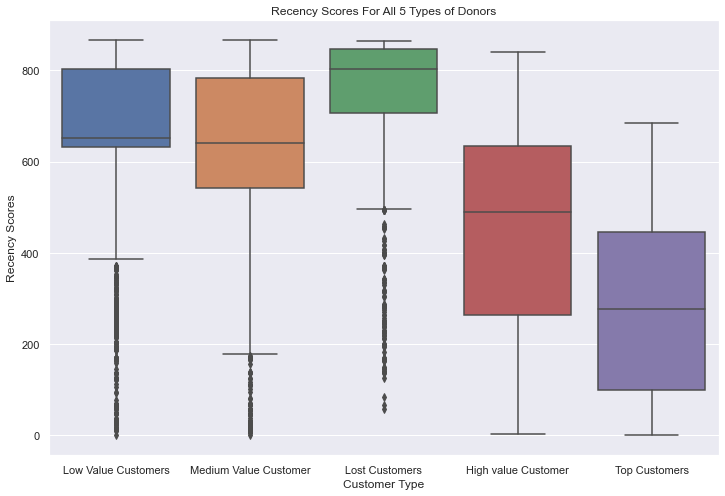

In [17]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(data=rfm_df, x='customertype', y='recency')
plt.title('Recency Scores For All 5 Types of Donors')
plt.xlabel('Customer Type')
plt.ylabel('Recency Scores')
# Top customers have overall lower recency?

Text(0, 0.5, 'Log Frequency Scores')

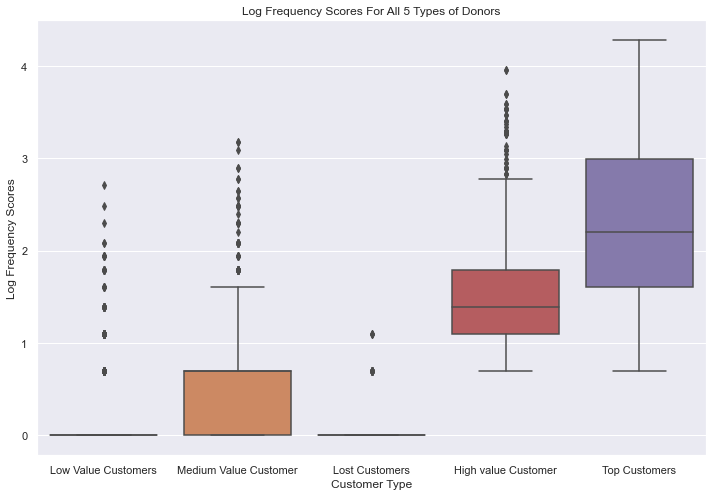

In [18]:
sns.boxplot(x=rfm_df['customertype'], y=np.log(rfm_df['totallifedonations']))
plt.title('Log Frequency Scores For All 5 Types of Donors')
plt.xlabel('Customer Type')
plt.ylabel('Log Frequency Scores')
# Top customers have overall greater frequency

Text(0, 0.5, 'Log Monetary Scores')

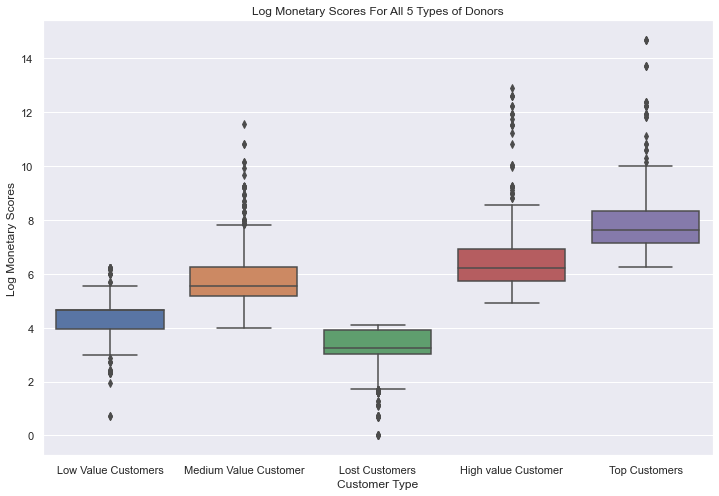

In [19]:
sns.boxplot(x=rfm_df['customertype'], y=np.log(rfm_df['lifetodategiving']))
plt.title('Log Monetary Scores For All 5 Types of Donors')
plt.xlabel('Customer Type')
plt.ylabel('Log Monetary Scores')
# Top customers have overall greater monetary
# Medium value customers havea dip in monetary

In [20]:
# Decrase emails sent; top customers have much l